In [1]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.model_selection import KFold,GridSearchCV
import os
import pandas as pd

In [2]:
dir_data=""
f_app_train=os.path.join(dir_data,"train.csv")
f_app_test = os.path.join(dir_data,"test.csv")
f_app_trainLabel = os.path.join(dir_data,"trainLabels.csv")

app_train=pd.read_csv(f_app_train,header=None)
app_test = pd.read_csv(f_app_test,header=None)
app_trainLabel = pd.read_csv(f_app_trainLabel,header=None)

#app_train.head()

In [3]:
import numpy as np
x,y=app_train,np.ravel(app_trainLabel)

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [5]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
a=knn.score(x_test,y_test)

In [6]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=1)
tree.fit(x_train,y_train)

tree.predict(x_test)
b=tree.score(x_test,y_test)

In [7]:
#LinearModel
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

model.predict(x_test)
c=model.score(x_test,y_test)

In [8]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

svc.predict(x_test)
d=svc.score(x_test,y_test)

C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

random_forest.predict(x_test)
e=random_forest.score(x_test,y_test)


C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(15,15))
mlp.fit(x_train,y_train)

mlp.predict(x_test)
f=mlp.score(x_test,y_test)


C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
#GradientBoostingClassifier
gboost=GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=100)
gboost.fit(x_train,y_train)

gboost.predict(x_test)
g=gboost.score(x_test,y_test)

In [12]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=4)
gbr.fit(x_train,y_train)

gbr.predict(x_test)
h=gbr.score(x_test,y_test)

In [13]:
n_estimators=[100,300,500,700]
max_depth=[1,3,5,7]

param_grid=dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search=GridSearchCV(gbr,param_grid,scoring="neg_mean_squared_error",n_jobs=-1,verbose=1)

grid_result=grid_search.fit(x_train,y_train)



C:\Users\cheng\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   20.8s finished


In [14]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 700}

In [15]:
gbr_param=GradientBoostingRegressor(max_depth=grid_result.best_params_['max_depth'],n_estimators=grid_result.best_params_['n_estimators'])
gbr_param.fit(x_train,y_train)

gbr_param.predict(x_test)
i=gbr_param.score(x_test,y_test)

In [16]:
dict={}

In [17]:
#show all score
scores=[a,b,c,d,e,f,g,h,i]
labels=['knn','DT','LR','SVC','RF','MLP','GB','GBR','GBR_Param']

for i in range(len(scores)):
    dict[labels[i]]=scores[i]
print(dict)

{'knn': 0.896, 'DT': 0.76, 'LR': 0.3670959562638758, 'SVC': 0.884, 'RF': 0.796, 'MLP': 0.844, 'GB': 0.856, 'GBR': 0.5090623935593482, 'GBR_Param': 0.5477626572499044}


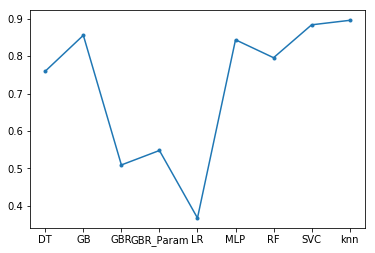

In [19]:
import matplotlib.pyplot as plt
lists=sorted(dict.items())

X,Y=zip(*lists)
plt.plot(X,Y,marker='.')
plt.show()

In [20]:
app_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [21]:
#a=svc.predict(app_test)
a=random_forest.predict(app_test)


In [22]:
submission=pd.DataFrame(random_forest.predict(app_test))
submission.columns=['Solution']
submission['Id']=np.arange(1,submission.shape[0]+1)
submission=submission[['Id','Solution']]


In [23]:
submission.to_csv('submission_with_randomforest_1.csv',index=False)

In [24]:
a = svc.predict(app_test)

In [38]:
submission = pd.DataFrame(svc.predict(app_test))
submission.columns = ['Solution']
submission['Id'] = np.arange(1,submission.shape[0]+1)
submission = submission[['Id', 'Solution']]

In [25]:
submission.to_csv('submission_with_scaling_1.csv', index=False)